📌 미션에 도전하기 전에 먼저!!

이번 미션에 활용되는 데이터를 다운로드 받기 위해, 주피터 노트북에서 다음 셀을 먼저 실행해주세요.

나의 컴퓨터 환경에 데이터를 저장하지 않아도, 웹 사이트에서 바로 데이터를 받아올 수 있습니다.

원활한 피드백을 위해 미션을 제출할 때에도 아래 코드를 꼭 포함해서 제출해주세요!

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)


## 필요한 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline


## 시각화를 위한 폰트 설정

In [3]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

In [4]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [5]:
# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [7]:
# 결측치 구하기
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

In [8]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
df_null_count = df.isnull().sum().reset_index()

In [9]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_col = df_null_count.sort_values(by="결측치수", ascending=False).head(9)
df_null_col

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922


In [10]:
drop_columns = df_null_col["컬럼명"].values
drop_columns

array(['지점명', '동정보', '건물부번지', '호정보', '층정보', '건물명', '지번부번지', '표준산업분류코드',
       '표준산업분류명'], dtype=object)

In [11]:
df.shape

(91335, 39)

In [12]:
df = df.drop(columns=drop_columns, axis=1)
df.shape

(91335, 30)

# 📌 Q1. 전국 시도별 약국수를 구해주세요!

상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
다음의 결과가 나오도록 구합니다.

🔽 출력 예시

```
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
```



In [13]:
# 먼저 상권업종소분류명이 약국인 row만 뽑아 새로운 df 생성
pharmacy = df[df['상권업종소분류명'] == '약국'].copy()
pharmacy.head(3)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,48.0,경상남도,...,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
15,21006553,상명약국,S,의료,S02,약국/한약방,S02A01,약국,47.0,경상북도,...,경상북도 경주시 성건동 340-4,471303305009,경상북도 경주시 금성로,281,4713010800103400004022515,경상북도 경주시 금성로 281,780943.0,38156.0,129.206670,35.842804


In [14]:
# value_counts()로 구하기
pharmacy['시도명'].value_counts()

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: count, dtype: int64

In [15]:
# groupby로 구하기
# 그룹이 되는 컬럼 : 시도명 / 계산하고싶은 컬럼 : 상권업종소분류명
# 구해준 다음 정렬까지

pharmacy_group = pharmacy.groupby('시도명')['상권업종소분류명'].count()
pharmacy_group.sort_values(ascending=False)

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 상권업종소분류명, dtype: int64

# 📌 Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!

다음의 결과가 나오도록 구합니다.

🔽 출력 예시

```
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64
```



## 병원, 약국, 동물병원 찾기

In [16]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [17]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [18]:
# 새로운 변수에 포함
animal_hospital = df[df['상권업종소분류명'] == '동물병원']
animal_hospital.shape

(3098, 30)

In [19]:
hospital = df[df['상권업종중분류명'] == '병원']
hospital.shape

(60774, 30)

## 시도별 동물병원, 약국, 병원 개수 구하기

In [20]:
# 위 문제와 동일하게 시도명을 구분하여 구해준다.
animal_group = animal_hospital['시도명'].value_counts()
animal_group

시도명
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: count, dtype: int64

In [21]:
# 또는
# animal_group = animal_hospital.groupby('시도명')['상권업종소분류명'].count()
# animal_group.sort_values(ascending=False)

In [22]:
hospital_group = hospital['시도명'].value_counts()
hospital_group

시도명
경기도        14101
서울특별시      13406
부산광역시       4601
경상남도        3218
인천광역시       3159
대구광역시       3119
경상북도        2603
전라북도        2497
충청남도        2165
광주광역시       2152
대전광역시       2039
전라남도        1992
충청북도        1659
강원도         1576
울산광역시       1297
제주특별자치도      721
세종특별자치시      219
Name: count, dtype: int64

In [23]:
pharmacy_group = pharmacy['시도명'].value_counts()
pharmacy_group

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: count, dtype: int64

In [24]:
compare_df = pd.DataFrame({'A' : animal_group, 'B' : pharmacy_group, 'C' : hospital_group})
compare_df

,A,B,C
시도명,,,
강원도,85,729,1576
경기도,992,4510,14101
경상남도,161,1017,3218
경상북도,165,915,2603
광주광역시,71,691,2152
대구광역시,119,870,3119
대전광역시,77,603,2039
부산광역시,153,1130,4601
서울특별시,557,3579,13406


In [25]:
compare_df.columns = ["동물병원", "약국", "병원"]
compare_df

,동물병원,약국,병원
시도명,,,
강원도,85,729,1576
경기도,992,4510,14101
경상남도,161,1017,3218
경상북도,165,915,2603
광주광역시,71,691,2152
대구광역시,119,870,3119
대전광역시,77,603,2039
부산광역시,153,1130,4601
서울특별시,557,3579,13406


In [52]:
area_name = compare_df.index
area_name = area_name.tolist()
area_name

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

## 시각화

<Axes: ylabel='시도명'>

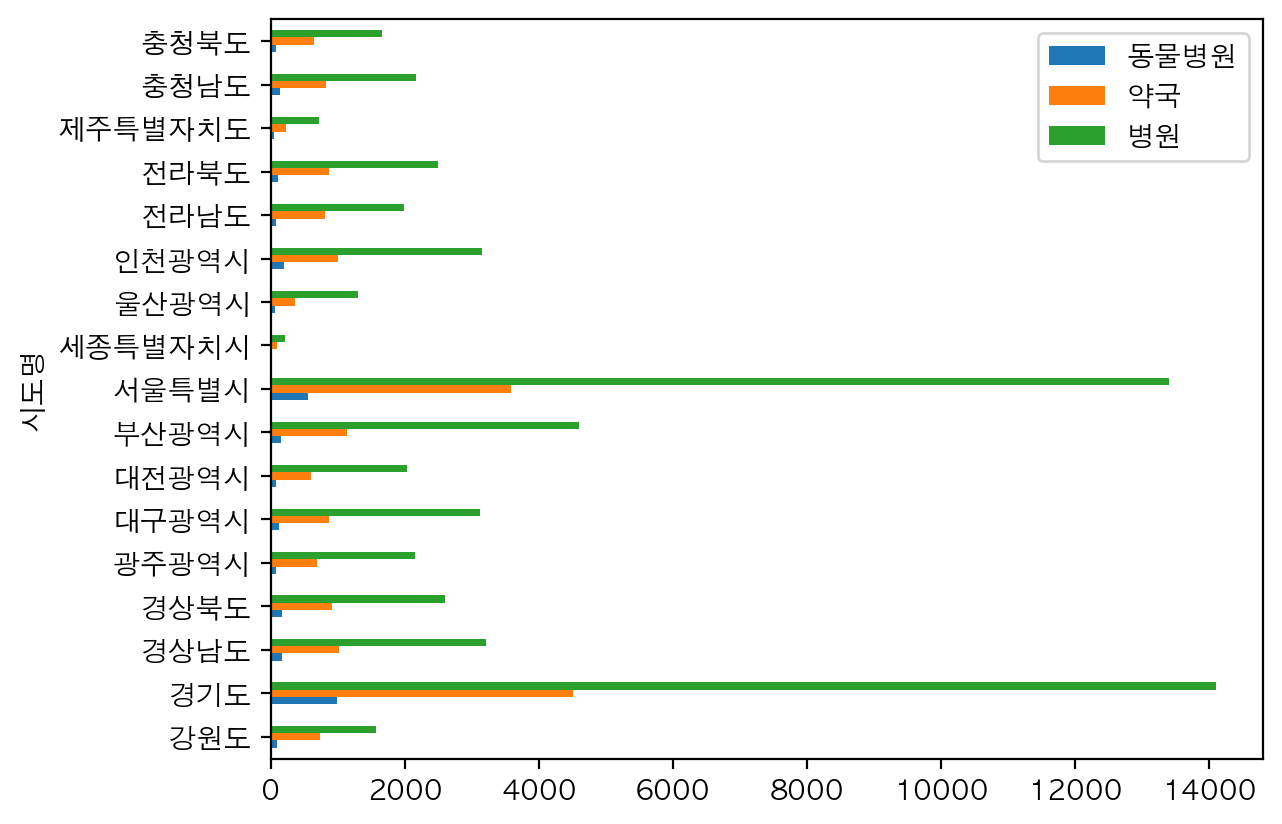

In [28]:
# bar chart
compare_df.plot.barh()

<Axes: xlabel='시도명'>

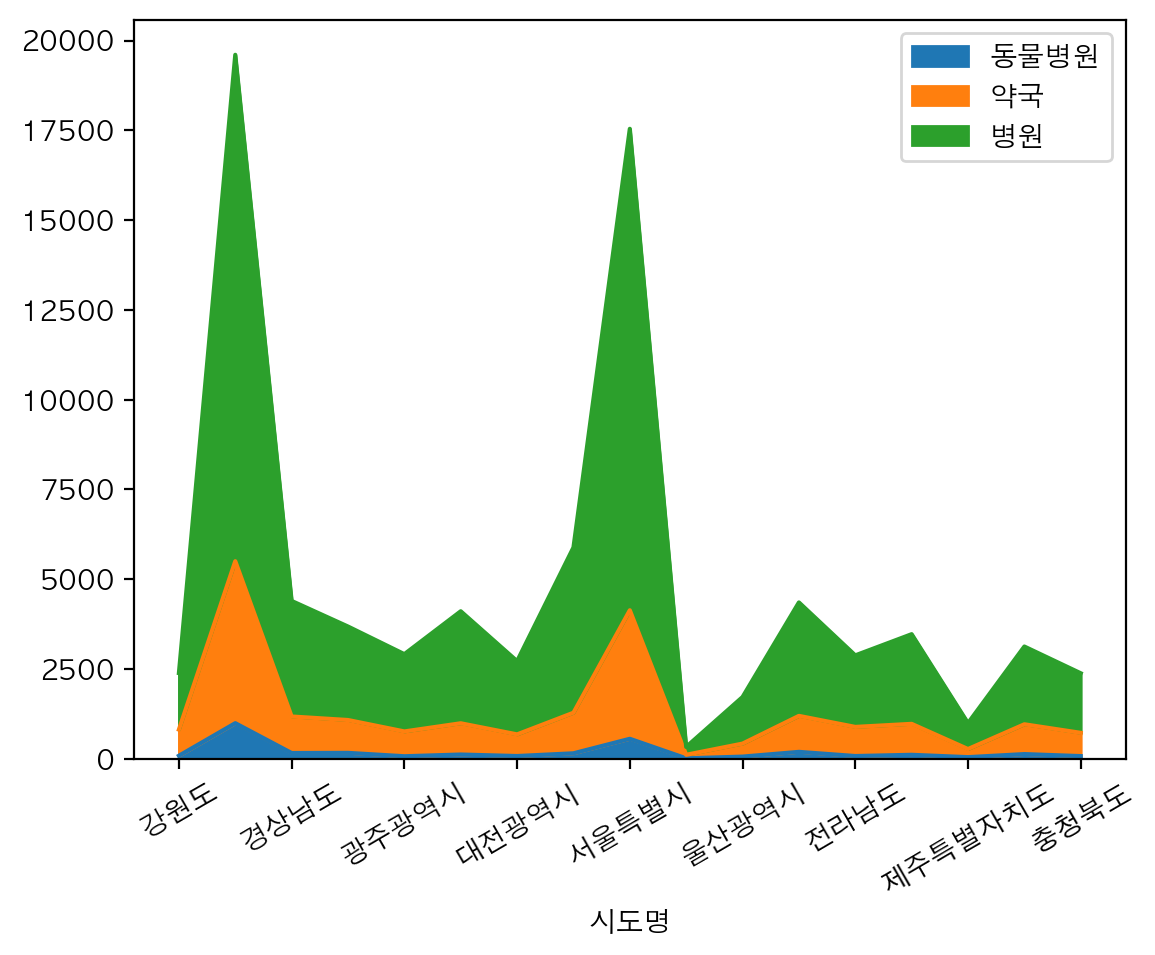

In [34]:
# area chart
compare_df.plot.area(rot=30)

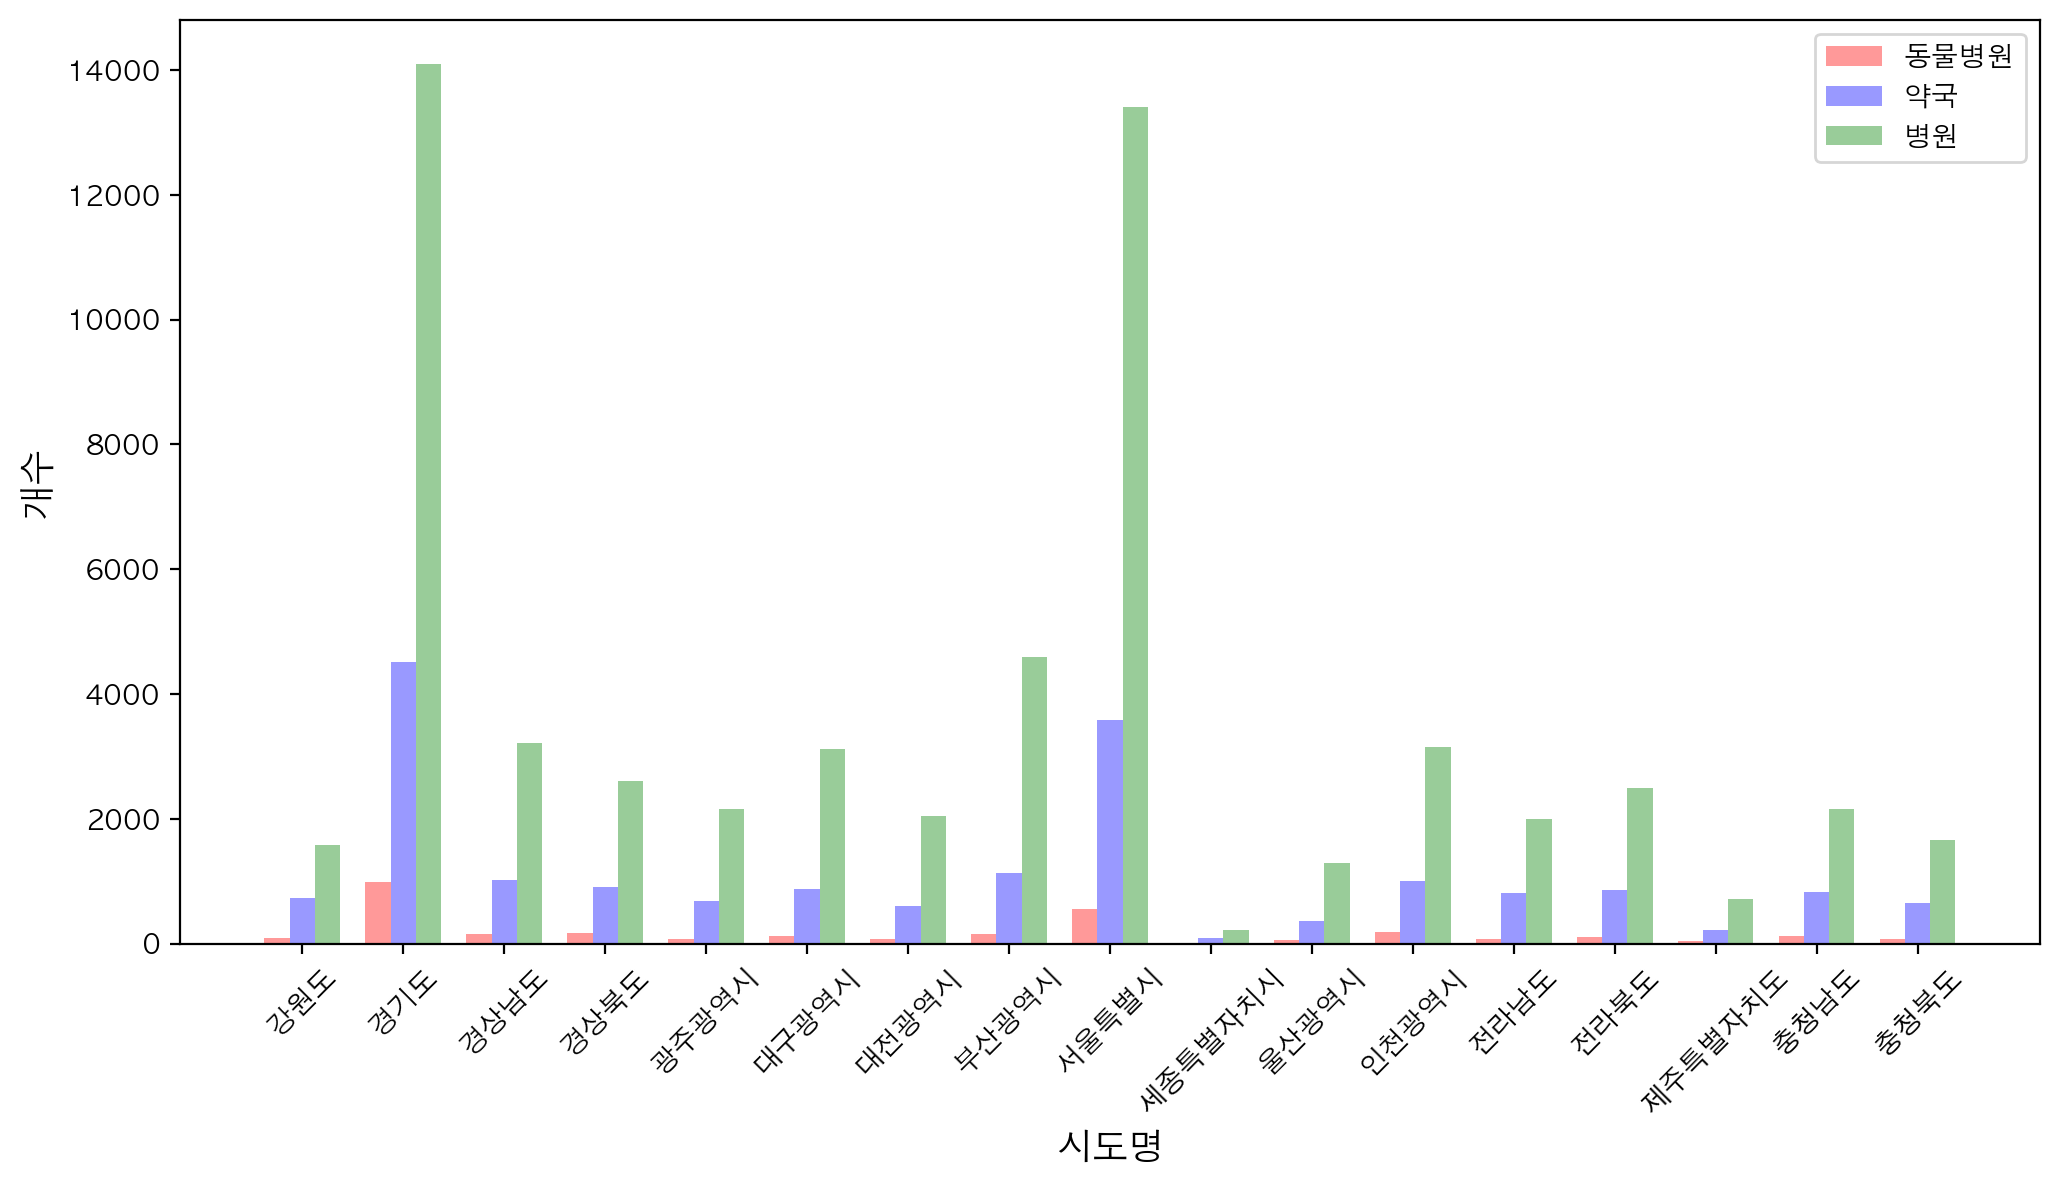

In [61]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 지역이 17개
index = np.arange(17)

# 3개 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, compare_df['동물병원'], bar_width, alpha=0.4, color='red', label='동물병원')

b2 = plt.bar(index + bar_width, compare_df['약국'], bar_width, alpha=0.4, color='blue', label='약국')

b3 = plt.bar(index + 2 * bar_width, compare_df['병원'], bar_width, alpha=0.4, color='green', label='병원')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 17 + bar_width, 1), area_name)

# x축, y축 이름 및 범례 설정
plt.xlabel('시도명', size = 13)
plt.xticks(rotation=45)
plt.ylabel('개수', size = 13)
plt.legend()
plt.show()

위와 같은 결과를 보았을 때, 동물병원은 유동인구가 많은 경기도와 서울에 가장 많이 분포하는 것을 알 수 있다. 

# 📌Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.



1. 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
2. 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
3. 비율이 높은 순서대로 정렬되게 구해주세요!


수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
소숫점 두 번째 자리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!


🔽 출력 예시
```
시군구명
강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02

```




## 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾기

In [74]:
# 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾기

beauty = df[df['상권업종소분류명'].str.contains('피부|성형')]
beauty.shape

(3835, 30)

In [73]:
seoul_beauty = beauty[beauty['시도명'] == '서울특별시']
seoul_beauty.shape

(1373, 30)

## 피부과 성형외과 수 / 전체병원 수 로 비율 구하기

### 서울 전체 병원 수 파악

In [64]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [66]:
seoul = df[(df['상권업종중분류명'] == '병원') & (df['시도명'] == '서울특별시')]
seoul.shape

(13406, 30)

### 비율 구하고 정렬하기

In [83]:
s_beauty = seoul_beauty['시군구명'].value_counts()
s_hospital = seoul['시군구명'].value_counts()

In [84]:
ratio = (s_beauty / s_hospital).round(2).sort_values(ascending=False)
ratio

시군구명
강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
Name: count, dtype: float64

# 📌Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요! <br>
다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다. <br>
folium 문서 : https://python-visualization.github.io/folium/quickstart.html

## 전국의 '노인/치매병원' 찾기

In [88]:
import folium

In [89]:
dementia = df[df['상권업종소분류명'] == '노인/치매병원'].copy()
dementia.shape

(1055, 30)

In [91]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
fmap = folium.Map(location=[dementia['위도'].mean(), dementia['경도'].mean()], 
                 zoom_start=8)
fmap

In [92]:
# 팝업에 들어갈 텍스트를 지정해 줍니다.
# 상호명과 주소를 붙여서 출력되도록 합니다.
# df.loc[n, 'col']은 n번 인덱스 row의 col의 내용만 불러옴

for n in dementia.index:    
    name = dementia.loc[n, '상호명']
    address = dementia.loc[n, '도로명주소']
    popup = f"{name}_{address}"
    print(popup)
    
# 전국의 노인/치매병원의 상호명과 주소를 가져옴

다사랑요양병원_부산광역시 북구 덕천로 339
노경회_전라남도 광양시 진월면 용소길 7
일산카네이션너싱홈_경기도 고양시 일산동구 중산로 241
은성복지회_전라남도 순천시 조비길 298
하은실버홈_경상북도 상주시 낙동면 영남제일로 125-17
행복한쉼터_충청남도 아산시 음봉면 월암로201번길 28-12
안심노인주간보호센터사하점_부산광역시 사하구 다대낙조2길 3
원광효도요양병원_전라북도 군산시 조촌2길 18
신우재활요양병원_서울특별시 동대문구 한천로 207
청송노인종합센터_경상북도 청송군 청송읍 논시골로 179
경북도립김천노인전문요양병원_경상북도 김천시 어모면 신애길 89
가나안노인전문요양병원_경상북도 성주군 성주읍 심산로 95-7
고령효사랑요양병원효사랑복지센터_경상북도 고령군 대가야읍 대가야로 1345
노인전문간호센타_경상북도 경주시 현곡면 충현로 610-119
노블하임_경상남도 합천군 용주면 연촌우곡길 70
사라복지재단_경기도 구리시 동구릉로389번길 27-9
천마산한누리요양병원_경기도 남양주시 화도읍 먹갓로 78
삶과돌봄_경기도 고양시 덕양구 흥도로 367-53
은혜의집_전라남도 나주시 산포면 매화2길 21
예사랑실버의원_경기도 부천시 길주로 307
예은원_전라북도 완주군 상관면 춘향로 4615-44
충주시노인전문병원_충청북도 충주시 동량면 충원대로 1398
송효의료재단효산요양병원_대구광역시 수성구 동대구로 245
효자의집_경기도 화성시 정남면 음양5길 67-79
금강요양병원_강원도 동해시 동해대로 5143
공주현대요양병원_충청남도 공주시 정안면 장원길 345-33
천사복지재단_강원도 홍천군 홍천읍 긴밭들1길 19
진성요양병원_경기도 안산시 단원구 달미로 114-1
한사랑노인전문병원_대전광역시 중구 대종로 203
한마음의원_대전광역시 중구 대종로 203
서천요양병원_충청남도 서천군 서천읍 삼산북길56번길 10
부여요양병원_충청남도 부여군 규암면 반산로 39
형주노인요양병원_부산광역시 금정구 금강로 638
연제나라요양병원_부산광역시 연제구 중앙대로 1175
기장

In [93]:
# 위의 데이터를 지도에 나타내기

for n in dementia.index:
    name = dementia.loc[n, '상호명']
    address = dementia.loc[n, '도로명주소']
    popup = f"{name}_{address}"
    location = [dementia.loc[n, '위도'], dementia.loc[n, '경도']]
    folium.Marker(
        location = location, 
        popup = popup
    ).add_to(fmap)
fmap